In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")


In [45]:
dow_path = '/Users/figol/Downloads/Data/^DJI.csv'
nasdaq_path = '/Users/figol/Downloads/Data/^IXIC.csv'
sp500_path = '/Users/figol/Downloads/Data/^GSPC.csv'
capital = 10000000 # 10 million
period = 5


In [46]:
dow = pd.read_csv(dow_path)
nasdaq = pd.read_csv(nasdaq_path)

dow_df = pd.DataFrame(dow[['Date','Adj Close']].ffill()) # lets isolate the adjusted close data and then forward fill it to remove 'nan' cells

dow_df.head()

,Date,Adj Close
0,2018-02-06,24912.769531
1,2018-02-07,24893.349609
2,2018-02-08,23860.460938
3,2018-02-09,24190.900391
4,2018-02-12,24601.269531


In [47]:
dow_df['returns'] = dow_df['Adj Close'].diff() # creating the 'returns' column
dow_df.head()

,Date,Adj Close,returns
0,2018-02-06,24912.769531,NaN
1,2018-02-07,24893.349609,-19.419922
2,2018-02-08,23860.460938,-1032.888671
3,2018-02-09,24190.900391,330.439453
4,2018-02-12,24601.269531,410.369140


In [48]:
dow_df['delta'] = dow_df['returns']
dow_df['delta'][dow_df['delta'] > 0] = 1
dow_df['delta'][dow_df['delta'] < 0] = -1
dow_df['delta'][dow_df['delta'] == 0] = 0
dow_df.head()

,Date,Adj Close,returns,delta
0,2018-02-06,24912.769531,NaN,NaN
1,2018-02-07,24893.349609,-19.419922,-1.0
2,2018-02-08,23860.460938,-1032.888671,-1.0
3,2018-02-09,24190.900391,330.439453,1.0
4,2018-02-12,24601.269531,410.369140,1.0


In [49]:
for i in range(5):
    dow_df['delta' + str(i)] = dow_df['delta'].shift(i)

dow_df.tail(10)

,Date,Adj Close,returns,delta,delta0,delta1,delta2,delta3,delta4
746,2021-01-25,30960.000000,-36.980469,-1.0,-1.0,-1.0,-1.0,1.0,1.0
747,2021-01-26,30937.039063,-22.960937,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
748,2021-01-27,30303.169922,-633.869141,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
749,2021-01-28,30603.359375,300.189453,1.0,1.0,-1.0,-1.0,-1.0,-1.0
750,2021-01-29,29982.619141,-620.740234,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
751,2021-02-01,30211.910156,229.291015,1.0,1.0,-1.0,1.0,-1.0,-1.0
752,2021-02-02,30687.480469,475.570313,1.0,1.0,1.0,-1.0,1.0,-1.0
753,2021-02-03,30723.599609,36.119140,1.0,1.0,1.0,1.0,-1.0,1.0
754,2021-02-04,31055.859375,332.259766,1.0,1.0,1.0,1.0,1.0,-1.0
755,2021-02-05,31162.859375,107.000000,1.0,1.0,1.0,1.0,1.0,1.0


In [50]:
# finding alpha score for every period of 5 days
dow_df['delta_score'] = dow_df[['delta0', 'delta1', 'delta2', 'delta3', 'delta4']].sum(axis = 1, skipna= False)
dow_df.head(10)

,Date,Adj Close,returns,delta,delta0,delta1,delta2,delta3,delta4,delta_score
0,2018-02-06,24912.769531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-07,24893.349609,-19.419922,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN
2,2018-02-08,23860.460938,-1032.888671,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN
3,2018-02-09,24190.900391,330.439453,1.0,1.0,-1.0,-1.0,NaN,NaN,NaN
4,2018-02-12,24601.269531,410.369140,1.0,1.0,1.0,-1.0,-1.0,NaN,NaN
5,2018-02-13,24640.449219,39.179688,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0
6,2018-02-14,24893.490234,253.041015,1.0,1.0,1.0,1.0,1.0,-1.0,3.0
7,2018-02-15,25200.369141,306.878907,1.0,1.0,1.0,1.0,1.0,1.0,5.0
8,2018-02-16,25219.380859,19.011718,1.0,1.0,1.0,1.0,1.0,1.0,5.0
9,2018-02-20,24964.750000,-254.630859,-1.0,-1.0,1.0,1.0,1.0,1.0,3.0


In [51]:
dow_df['alpha_score'] = -dow_df['delta_score'].shift(1)
dow_df.tail(10)

,Date,Adj Close,returns,delta,delta0,delta1,delta2,delta3,delta4,delta_score,alpha_score
746,2021-01-25,30960.000000,-36.980469,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0
747,2021-01-26,30937.039063,-22.960937,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-3.0,1.0
748,2021-01-27,30303.169922,-633.869141,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-5.0,3.0
749,2021-01-28,30603.359375,300.189453,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-3.0,5.0
750,2021-01-29,29982.619141,-620.740234,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-3.0,3.0
751,2021-02-01,30211.910156,229.291015,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,3.0
752,2021-02-02,30687.480469,475.570313,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0
753,2021-02-03,30723.599609,36.119140,1.0,1.0,1.0,1.0,-1.0,1.0,3.0,-1.0
754,2021-02-04,31055.859375,332.259766,1.0,1.0,1.0,1.0,1.0,-1.0,3.0,-3.0
755,2021-02-05,31162.859375,107.000000,1.0,1.0,1.0,1.0,1.0,1.0,5.0,-3.0


In [52]:
# capital allocation logic ******
# we need to adjust the capital allocated to the stock based on the alpha score (higher score = higher confidence, certainty) 
# if alpha score = 5 --> highest likelihood to revert upwards tomorrow --> i want to allocate as much capital as possible (100%)
# if alpha score = 4 --> high likelihood to revert upward tomorrow --> i want to allocate 4/5 of my capital (80%)
# if alpha score = -5 --> highest likelihood to revert downward tomorrow --> i want to allocate all of my capital to short(-100%)
# if alpha score = -4 --> high likelihood to revert downward tomorrow --> i want to allocate 4/5 of my capital to short(-80%)

# the simple method to adjust this is:
# normalise the alpha score to [-1, 1]
dow_df['alpha_score_adjusted'] = dow_df['alpha_score']/5
dow_df.tail(10)

,Date,Adj Close,returns,delta,delta0,delta1,delta2,delta3,delta4,delta_score,alpha_score,alpha_score_adjusted
746,2021-01-25,30960.000000,-36.980469,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,0.2
747,2021-01-26,30937.039063,-22.960937,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-3.0,1.0,0.2
748,2021-01-27,30303.169922,-633.869141,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-5.0,3.0,0.6
749,2021-01-28,30603.359375,300.189453,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-3.0,5.0,1.0
750,2021-01-29,29982.619141,-620.740234,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-3.0,3.0,0.6
751,2021-02-01,30211.910156,229.291015,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,3.0,0.6
752,2021-02-02,30687.480469,475.570313,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,0.2
753,2021-02-03,30723.599609,36.119140,1.0,1.0,1.0,1.0,-1.0,1.0,3.0,-1.0,-0.2
754,2021-02-04,31055.859375,332.259766,1.0,1.0,1.0,1.0,1.0,-1.0,3.0,-3.0,-0.6
755,2021-02-05,31162.859375,107.000000,1.0,1.0,1.0,1.0,1.0,1.0,5.0,-3.0,-0.6


In [53]:
# make a percentage change column  
dow_df['pct_change'] = dow_df['Adj Close'].pct_change()
dow_df.tail(10)

,Date,Adj Close,returns,delta,delta0,delta1,delta2,delta3,delta4,delta_score,alpha_score,alpha_score_adjusted,pct_change
746,2021-01-25,30960.000000,-36.980469,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,0.2,-0.001193
747,2021-01-26,30937.039063,-22.960937,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-3.0,1.0,0.2,-0.000742
748,2021-01-27,30303.169922,-633.869141,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-5.0,3.0,0.6,-0.020489
749,2021-01-28,30603.359375,300.189453,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-3.0,5.0,1.0,0.009906
750,2021-01-29,29982.619141,-620.740234,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-3.0,3.0,0.6,-0.020283
751,2021-02-01,30211.910156,229.291015,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,3.0,0.6,0.007647
752,2021-02-02,30687.480469,475.570313,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,0.2,0.015741
753,2021-02-03,30723.599609,36.119140,1.0,1.0,1.0,1.0,-1.0,1.0,3.0,-1.0,-0.2,0.001177
754,2021-02-04,31055.859375,332.259766,1.0,1.0,1.0,1.0,1.0,-1.0,3.0,-3.0,-0.6,0.010814
755,2021-02-05,31162.859375,107.000000,1.0,1.0,1.0,1.0,1.0,1.0,5.0,-3.0,-0.6,0.003445


In [54]:
# if you want to find out the pnl in $ value
# we have to multiply adj alpha score by the capital we have (i.e. 10m)
dow_df['capital_allocation'] = dow_df['alpha_score_adjusted'] * capital
dow_df.tail(10)

,Date,Adj Close,returns,delta,delta0,delta1,delta2,delta3,delta4,delta_score,alpha_score,alpha_score_adjusted,pct_change,capital_allocation
746,2021-01-25,30960.000000,-36.980469,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,0.2,-0.001193,2000000.0
747,2021-01-26,30937.039063,-22.960937,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-3.0,1.0,0.2,-0.000742,2000000.0
748,2021-01-27,30303.169922,-633.869141,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-5.0,3.0,0.6,-0.020489,6000000.0
749,2021-01-28,30603.359375,300.189453,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-3.0,5.0,1.0,0.009906,10000000.0
750,2021-01-29,29982.619141,-620.740234,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-3.0,3.0,0.6,-0.020283,6000000.0
751,2021-02-01,30211.910156,229.291015,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,3.0,0.6,0.007647,6000000.0
752,2021-02-02,30687.480469,475.570313,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,0.2,0.015741,2000000.0
753,2021-02-03,30723.599609,36.119140,1.0,1.0,1.0,1.0,-1.0,1.0,3.0,-1.0,-0.2,0.001177,-2000000.0
754,2021-02-04,31055.859375,332.259766,1.0,1.0,1.0,1.0,1.0,-1.0,3.0,-3.0,-0.6,0.010814,-6000000.0
755,2021-02-05,31162.859375,107.000000,1.0,1.0,1.0,1.0,1.0,1.0,5.0,-3.0,-0.6,0.003445,-6000000.0


In [56]:
'''
ignore comission fee, tax and assume we always trade against the adj close price
with always enough money to allocate the corresponding capital,

we can simply take the product of pct_change and capital allocation as the pnl (profit and loss).
'''
dow_df['daily_pnl'] = dow_df['capital_allocation'] * dow_df['pct_change']
dow_df.tail(100)

,Date,Adj Close,returns,delta,delta0,delta1,delta2,delta3,delta4,delta_score,alpha_score,alpha_score_adjusted,pct_change,capital_allocation,daily_pnl
656,2020-09-15,27995.599609,2.269531,1.0,1.0,1.0,1.0,-1.0,1.0,3.0,-1.0,-0.2,0.000081,-2000000.0,-162.147983
657,2020-09-16,28032.380859,36.781250,1.0,1.0,1.0,1.0,1.0,-1.0,3.0,-3.0,-0.6,0.001314,-6000000.0,-7882.935286
658,2020-09-17,27901.980469,-130.400390,-1.0,-1.0,1.0,1.0,1.0,1.0,3.0,-3.0,-0.6,-0.004652,-6000000.0,27910.663170
659,2020-09-18,27657.419922,-244.560547,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-3.0,-0.6,-0.008765,-6000000.0,52589.932949
660,2020-09-21,27147.699219,-509.720703,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-0.2,-0.018430,-2000000.0,36859.598939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2021-02-01,30211.910156,229.291015,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,3.0,0.6,0.007647,6000000.0,45884.786900
752,2021-02-02,30687.480469,475.570313,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,0.2,0.015741,2000000.0,31482.306848
753,2021-02-03,30723.599609,36.119140,1.0,1.0,1.0,1.0,-1.0,1.0,3.0,-1.0,-0.2,0.001177,-2000000.0,-2353.998402
754,2021-02-04,31055.859375,332.259766,1.0,1.0,1.0,1.0,1.0,-1.0,3.0,-3.0,-0.6,0.010814,-6000000.0,-64886.882441


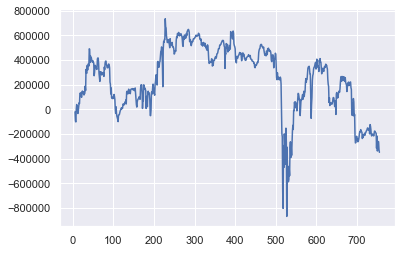

In [59]:
plt.plot(dow_df['daily_pnl'].cumsum())
# removing outliers like COVID may yield us a more positive overall pnl
plt.show()